# Telco Trouble: A Customer Service Conundrum  

### Description:  

Oh man, have you heard about the latest struggles at Telco Telecom Company? Their customer service team is overwhelmed with calls and emails from frustrated customers experiencing dropped calls, slow data speeds, and unexpected charges on their bills. The team needs help analyzing customer data to identify trends, resolve issues efficiently, and improve overall customer satisfaction.  

### Tasks:  
- **Trend Analysis:** Identify the top 5 reasons for customer complaints and create a bar chart to visualize the results.
- **Issue Resolution:** Write a function to categorize customer complaints by severity (high, medium, low) based on keywords in the issue description.
- **Phone Number Cleanup:** Clean up malformed phone numbers in the dataset by extracting the numeric portion and formatting it as XXX-XXX-XXXX.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys
import re # for regex operations

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


In [2]:
# set the seed
np.random.seed(0)

# generate customer data
customers = pd.DataFrame({
    'customer_id': np.arange(10000),
    'name': ['Customer {}'.format(i) for i in range(10000)],
    'phone_number': ['555-{}-{}'.format(np.random.randint(111, 999), np.random.randint(1111, 9999)) for _ in range(10000)],
    'issue_description': np.random.choice(['Dropped call', 'Slow data', 'Unexpected charge', 'Poor reception', 'Other'], size=10000),
    'calls': np.random.randint(0, 100, size=10000),
    'texts': np.random.randint(0, 1000, size=10000),
    'data_usage': np.random.randint(0, 10000, size=10000)
})

# add some malformed phone numbers
customers.loc[np.random.choice(customers.index, size=500), 'phone_number'] = [
    '555-123-4567 ext 101',
    '123-456-7890 x123',
    '(555) 123-4567',
    '5551234567',
    '555 123-4567'
] * 100

customers.head()

,customer_id,name,phone_number,issue_description,calls,texts,data_usage
0,0,Customer 0,555-795-4375,Poor reception,82,543,2696
1,1,Customer 1,555-946-5970,Poor reception,98,22,6368
2,2,Customer 2,555-818-9002,Slow data,1,973,2280
3,3,Customer 3,555-388-6985,Unexpected charge,88,196,2595
4,4,Customer 4,555-915-7855,Poor reception,40,583,8574


# The Data  

The dataset contains 10,000 customer records with information about their phone usage, issues they've experienced (such as dropped calls or slow data), and severity of those issues. The data also includes malformed phone numbers that need to be cleaned and standardized.

### Columns:  
- **customer_id:** Unique customer identifier
- **name:** Customer name
- **phone_number:** Customer phone number (some malformed)
- **issue_description:** Brief description of the customer's issue
- **issue_severity:** Severity level of the issue (High, Medium, Low). **Note:** column created in Task #2
- **calls:** Number of calls made by the customer
- **texts:** Number of texts sent by the customer
- **data_usage:** Amount of data used by the customer (in MB)

Let us take a look at the data types.

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        10000 non-null  int32 
 1   name               10000 non-null  object
 2   phone_number       10000 non-null  object
 3   issue_description  10000 non-null  object
 4   calls              10000 non-null  int32 
 5   texts              10000 non-null  int32 
 6   data_usage         10000 non-null  int32 
dtypes: int32(4), object(3)
memory usage: 390.8+ KB


# Trend Analysis: 

Identify the top 5 reasons for customer complaints and create a bar chart to visualize the results.

From the results below, we end up with the "Other" category as the most frequent customer complaint. If you want to dig a little deeper, you will have to determine how this category is created.  

Ask these questions:  
- Am I able to see the details of the call that ended up in the "Other" category?
- Is there a specific timeframe that these calls were placed in?
- Is there a team member that may have some background on the "Other" calls?

You may have some further clean up of the data, depending on what you are able to find.

In [4]:
# get a frequency count on the issue_description column
freq = customers['issue_description'].value_counts()
freq

issue_description
Other                2020
Unexpected charge    2015
Poor reception       1996
Slow data            1992
Dropped call         1977
Name: count, dtype: int64

Now, let us create the bar chart. We will also sort the results so it makes it easier to see the most frequent customer complaints.

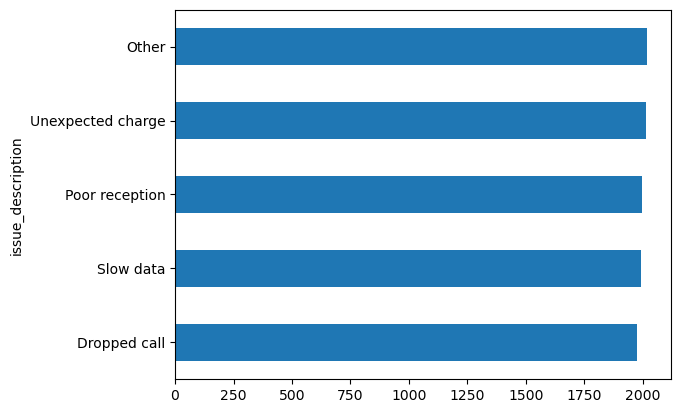

In [5]:
freq.sort_values().plot.barh();

# Issue Resolution: 

Write a function to categorize customer complaints by severity (high, medium, low) based on keywords in the issue description.  

**Notes on the function named `get_severity`:**  

`**dict.fromkeys()` is a Python expression that creates a new dictionary from an iterable (like a list or tuple) and assigns a default value to each key.  

Let us start by explaining how I created the dictionary:    

- `dict.fromkeys()` is a method that creates a new dictionary from an iterable.
- The ** operator is used to unpack the iterable and pass it as arguments to the `fromkeys()` method.

Below is the created dictionary. 
```
{'other': 'low',
 'reception': 'medium',
 'data': 'medium',
 'unexpected': 'high',
 'charge': 'high',
 'dropped': 'high'}
```

Here is an example run of the function. Assume the string being sent to the function is "slow data".  
- The mapping dict is created
- We start to loop through the keys of the dict
- The first key is "other", we make sure it is lower case and we ask, is "other" in the string "slow data"?
- The answer is no, and we move on to the next key
- The second key is "reception", we make sure it is lower case and we ask, is "reception" in the string "slow data"?
- The answer is no, and we move on to the next key
- The third key is "data", we make sure it is lower case and we ask, is "data" in the string "slow data"?
- The answer is yes
- We then return the dict value of "data", which in this case is "medium"

In [6]:
def get_severity(val):
    ''' 
    Categorize customer complaints by keyword
        low    = Other                         
        medium = reception, data               
        high   = unexpected, charge, dropped   
    '''

    # create category dict
    mapping = {**dict.fromkeys(['other'], 'low'), 
               **dict.fromkeys(['reception', 'data'], 'medium'),
               **dict.fromkeys(['unexpected', 'charge', 'dropped'], 'high')}

    # loop through dict
    for key in mapping:
        # is the key in the issue description string
        if key.lower() in val.lower():
            return mapping[key]
    return None    

In [7]:
customers['issue_severity'] = customers['issue_description'].apply(get_severity)
customers.head()

,customer_id,name,phone_number,issue_description,calls,texts,data_usage,issue_severity
0,0,Customer 0,555-795-4375,Poor reception,82,543,2696,medium
1,1,Customer 1,555-946-5970,Poor reception,98,22,6368,medium
2,2,Customer 2,555-818-9002,Slow data,1,973,2280,medium
3,3,Customer 3,555-388-6985,Unexpected charge,88,196,2595,high
4,4,Customer 4,555-915-7855,Poor reception,40,583,8574,medium


# Phone Number Cleanup: 

Clean up malformed phone numbers in the dataset by extracting the numeric portion and formatting it as XXX-XXX-XXXX.  

For example: "555-123-4567 ext 101" should become "555-123-4567"

In [8]:
def clean_tnum(phone_number):
    ''' Clean telephone numbers '''
    patterns = [
        ('ext \d+', ''),                                       # Remove extensions
        ('x\d+', ''),                                          # Remove extensions (alternative format)
        ('[()]', ''),                                          # Remove parentheses
        ('\d+\s+\d+', lambda x: x.group().replace(' ', '-')),  # Replace spaces with dashes if they are in between numebrs
        ('^(\d{3})(\d{3})(\d{4})$', r'\1-\2-\3')               # Add dashes in the correct format (xxx-xxx-xxxx)
    ]

    for pattern, replacement in patterns:
        phone_number = re.sub(pattern, replacement, phone_number)

    # the last strip here is used to remove any trailing spaces
    return phone_number.strip()

I copied the "phone_number" column into Excel via `pd.to_clipboard()` to visaually verify that the phone numbers where in fact clean. I noticed some of my strings were of length 13 and that was due to an extra space at the end of the strings.  

I noticed that some strings had extra spaces at the end, so I added `.strip()` to the return statement to handle this.

How would you have solved the extra space at the end of the string?

In [9]:
customers['phone_number'] = customers['phone_number'].apply(clean_tnum)
customers.head()

,customer_id,name,phone_number,issue_description,calls,texts,data_usage,issue_severity
0,0,Customer 0,555-795-4375,Poor reception,82,543,2696,medium
1,1,Customer 1,555-946-5970,Poor reception,98,22,6368,medium
2,2,Customer 2,555-818-9002,Slow data,1,973,2280,medium
3,3,Customer 3,555-388-6985,Unexpected charge,88,196,2595,high
4,4,Customer 4,555-915-7855,Poor reception,40,583,8574,medium


# Summary  

The tasks in this tutorial covered data manipulation, data cleaning, and data visualization, which are essential skills for working with real-world datasets.  

### What you learned:  
- How to perform trend analysis by counting the frequency of issue descriptions and visualizing the results in a bar chart
- How to write a function to categorize customer complaints by severity based on keywords in the issue description
- How to clean up malformed phone numbers in the dataset using regular expressions
- How to apply functions to Pandas DataFrames using the `apply()` method
- How to create new columns in a DataFrame based on the values of another column
- How to use the `value_counts()` method to get a frequency count of a column
- How to use the `plot.barh()` method to create a horizontal bar chart
- How to use the `re.sub()` method to replace patterns in strings using regular expressions

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>